<a href="https://colab.research.google.com/github/tqrahman/Hands-on-Machine-Learning/blob/main/Chapter2_End_to_End_Machine_Learning_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Steps to a ML project
1.   Look at the big picture
2.   Get the data
3. Discover and visualize the data to gain insights
4. Prepare the data for Machine Learning algorithms
5. Select a model and train it
6. Fine-tune your model
7. Present your solution
8. Launch, monitor, and maintain your system



## Public Datasets / Repositories



*   [UC Irvine ML Repository](http://archive.ics.uci.edu/ml/index.php)
*   [Kaggle Datasets](https://www.kaggle.com/datasets)
* [Amazon AWS datasets](https://registry.opendata.aws/)
* http://dataportals.org/
* http://opendatamonitor.eu/
* http://quandl.com/
* [Datasets in Wikipedia](https://en.wikipedia.org/wiki/List_of_datasets_for_machine-learning_research)
* [Quora](https://www.quora.com/Where-can-I-find-large-datasets-open-to-the-public)
* [Reddit](https://www.reddit.com/r/datasets/)

## California Housing Prices
Data from the 1990 Californa census


### 1. Looking at the Big Picture

#### Frame the Problem:
What exactly is the business objective? How can we use and benefit from the problem? Is it a supervised learning problem?
<br>
Answering these questions help determine what algorithms, performance measure, and how much effort is spent tweaking it.
<br><br>
TASK: Predict a district's median housing price.

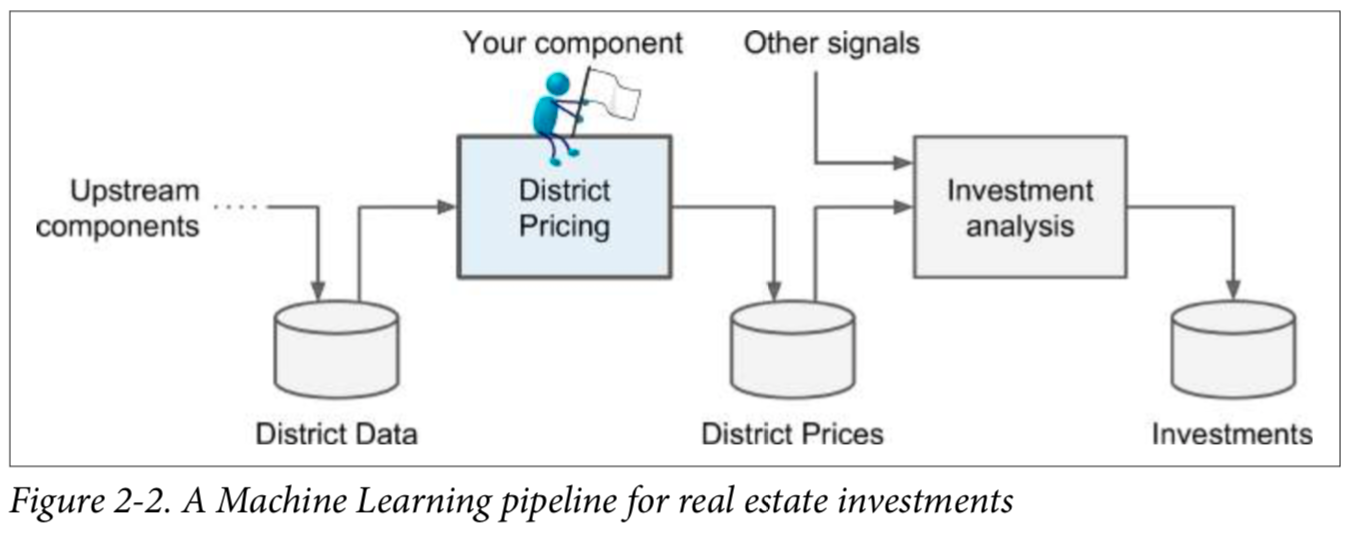

data pipeline: a sequence of data processing components
<br>


*   components typicall run asynchronously
*   pulls data from data storage -> processes it -> feeds it to another data storage
<br>

univariate regression: predicting only one value for each observation





Metrics are ways to measure the distance (norms) between two vectors (prediction vector and target vector)
* Root Mean Squared Error (RMSE): adds higher weight for large errors
* Mean Absolute Error (MAE) or Average Absolute Deviation: better choice if there are many outliers

### 2. Get the Data

In [ ]:
# Reading in the data

import pandas as pd
housing =  pd.read_csv("https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.csv")
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
# Viewing the info

housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


* There are 20,640 observations or instances in the dataset with 10 attributes. 
* The attribute 'total_bedrooms' has 20,433 non-null values which means 207 instances are missing.
* 'ocean_proximity' is the only object

In [ ]:
# Viewing the counts for each category in 'ocean_proximity'

housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [ ]:
# Use describe to view numerical columns

housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


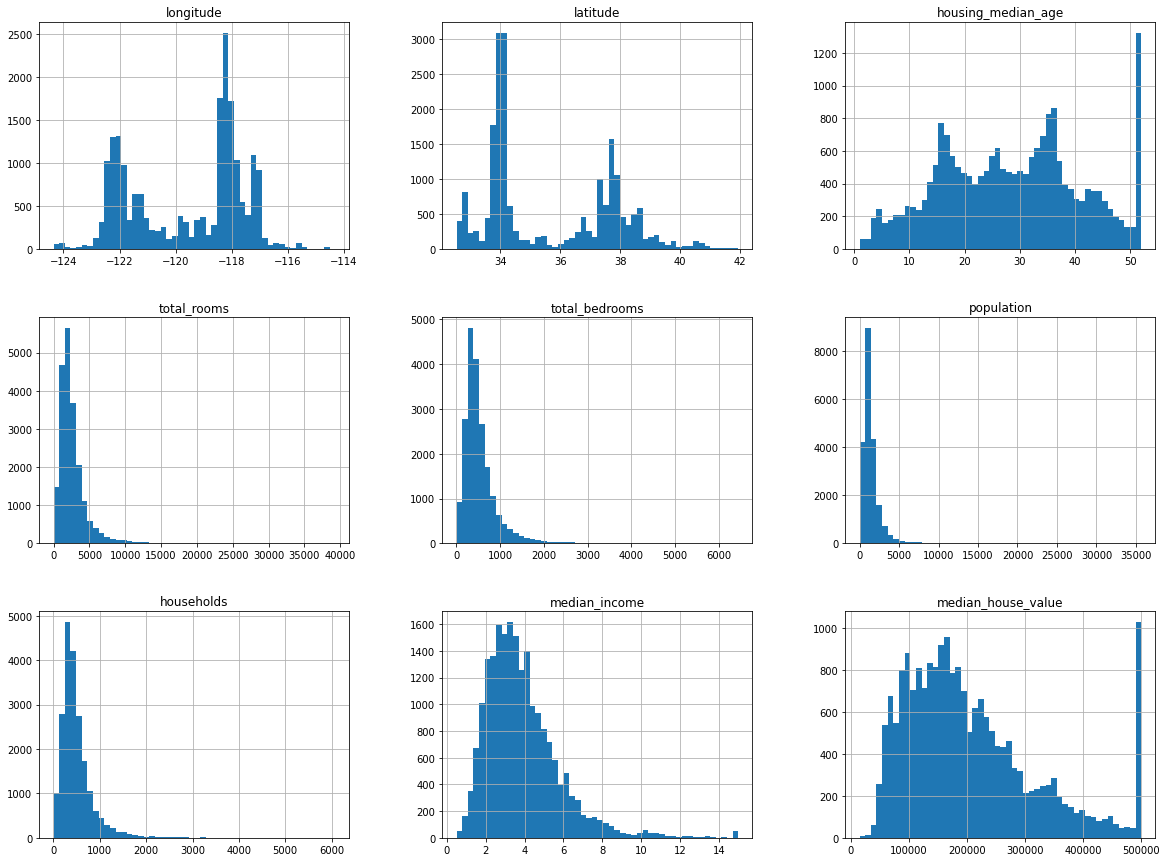

In [ ]:
# Plotting histograms for numerical columns

import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

Thoughts:
* Median income is probably scaled (10k). Capped at 15.001
* Housing median age and the median house value are also capped
* Attributes have different scales
* Most histograms are tail heavy (extend much farther to right). Need to transform

#### Create a Test Set

When estimating the generalization error using the test set, the estimate will be too optimistic (data snooping bias).
<br><br>
stratified sampling: the population is divided into subgroups (strata) and sampled to reflect the distribution of the population.

In [ ]:
# Splitting the data

from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

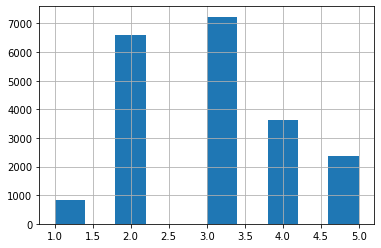

In [ ]:
# Converting income from numerical values to categorical using pd.cut()

import numpy as np

housing['income_cat'] = pd.cut(housing['median_income'],
                                 bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                                 labels=[1, 2, 3, 4, 5])
housing['income_cat'].hist()

In [ ]:
# Implementing Stratified Sampling

from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['income_cat']):
  strat_train_set = housing.loc[train_index]
  strat_test_set = housing.loc[test_index]

In [ ]:
# Viewing the proportion of income values in stratified folds

strat_test_set['income_cat'].value_counts()/len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [ ]:
# Viewing proportion of income values in total data

housing['income_cat'].value_counts()/len(housing)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

The proportion of the value counts remains constant.

In [ ]:
# Removing the income category that was created to stratify sampling

for set_ in (strat_train_set, strat_test_set):
  set_.drop('income_cat', axis=1, inplace=True)

### 3. Discover and Visualize the Data to Gain Insights

Explore the training data.

In [ ]:
# Only using the training data to analyze

housing = strat_train_set.copy()

#### Visualizing Geographical Data

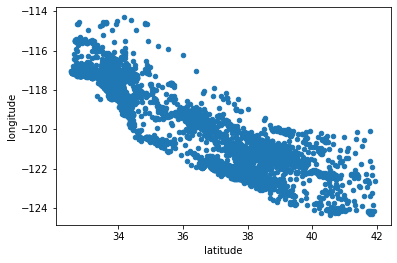

In [ ]:
# Plotting the latitude and longitude

housing.plot(kind="scatter", x="latitude", y="longitude")

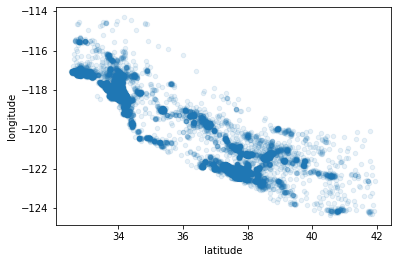

In [ ]:
# Changing alpha to identify a pattern

housing.plot(kind="scatter", x="latitude", y="longitude", alpha=0.1)

Changing the alpha to a lower value, changes the opacity of the dots. Now the dense areas in California is vizualized. 

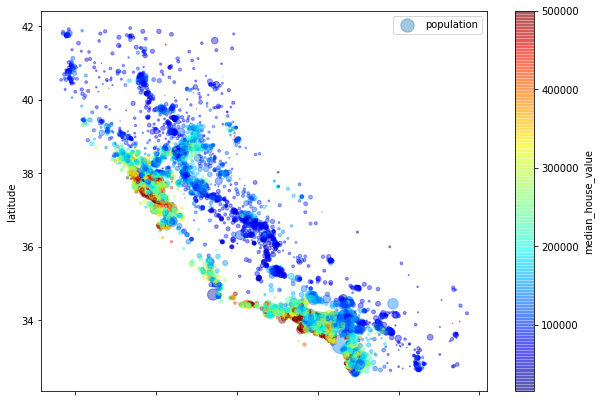

In [ ]:
# Using a heatmap to display the same data

housing.plot(kind="scatter",
             x="longitude",
             y="latitude",
             alpha=0.4,
             s=housing["population"]/100,
             label="population",
             figsize=(10,7),
             c="median_house_value",
             cmap=plt.get_cmap("jet"),
             colorbar=True)
plt.legend()

Housing prices are related to location. Locations near the ocean near the south are higher.

#### Looking for Correlations
use standard correlation (Pearson's r)
* find correlation between each pair
* good for small datasets

In [ ]:
# Creating a correlation matrix

corr_matrix = housing.corr()
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105848,0.048871,0.076598,0.108030,0.063070,-0.019583,-0.047432
latitude,-0.924478,1.000000,0.005766,-0.039184,-0.072419,-0.115222,-0.077647,-0.075205,-0.142724
housing_median_age,-0.105848,0.005766,1.000000,-0.364509,-0.325047,-0.298710,-0.306428,-0.111360,0.114110
total_rooms,0.048871,-0.039184,-0.364509,1.000000,0.929379,0.855109,0.918392,0.200087,0.135097
total_bedrooms,0.076598,-0.072419,-0.325047,0.929379,1.000000,0.876320,0.980170,-0.009740,0.047689
population,0.108030,-0.115222,-0.298710,0.855109,0.876320,1.000000,0.904637,0.002380,-0.026920
households,0.063070,-0.077647,-0.306428,0.918392,0.980170,0.904637,1.000000,0.010781,0.064506
median_income,-0.019583,-0.075205,-0.111360,0.200087,-0.009740,0.002380,0.010781,1.000000,0.687160
median_house_value,-0.047432,-0.142724,0.114110,0.135097,0.047689,-0.026920,0.064506,0.687160,1.000000


In [ ]:
# Viewing the correlation of only "median_house_value"

corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

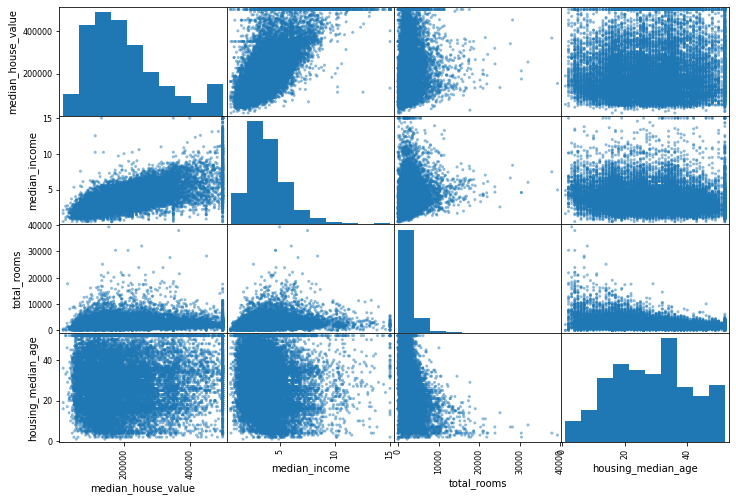

In [ ]:
# Using pandas' scatter_matrix function

from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12,8));

"median_income" has a correlation with "median_house_value"

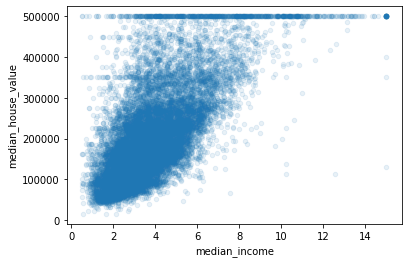

In [ ]:
# Plotting scatter plot between housing and income

housing.plot(kind="scatter", 
             x="median_income", 
             y="median_house_value",
             alpha=0.1)

This plot reveals few things:
* Strong correlation: upward trend and points not too dispersed
* there is a price cap: horizontal line at $500,000

* there are other horizontal lines at 450k, 350k, and 280k. Might need to remove them so models don't repoduce this quirks 

#### Experimenting with Attribute Combinations


In [ ]:
# Generating some features

housing['rooms_per_household'] = housing['total_rooms']/housing['households']
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [ ]:
# Viewing the correlation

corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

'bedrooms_per_room' is more correlated with 'median_house_value' than the original features used to create it ('total_rooms', 'total_bedrooms'

### 3. Prepare the Data for Machine Learning Algorithms

---


Create functions that prepare the data because:
* allows reproduction of the transformations easily on dataset
* build a library of transformation functions that can be reused in future projects
* use it on live systems
* easily try various combinations of transformations to see which one is best


In [ ]:
# Getting clean train data

housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

#### Data Cleaning
Missing Values:
* Get rid of corresponding districts
* get rid of whole attribute
* set the values to some value

In [ ]:
# Getting rid of corresponding districts
housing.dropna(subset=["total_bedrooms"])

# Getting rid of the whole attribute
housing.drop("total_bedrooms", axis=1)

# Setting the values to the median
median = housing["total_bedrooms"].median() # Impute the same median value in the test data
housing["total_bedrooms"].fillna(median, inplace=True)

In [ ]:
# Imputing using Scikit-Learn

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

Since "ocean_proximity" is a categorical variable, it needs to be removed before applying SimpleImputer

In [ ]:
# Separating numerical variables from "ocean_proximity"

housing_numericals = housing.drop("ocean_proximity", axis=1)
imputer.fit(housing_numericals)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [ ]:
# Viewing the results of imputer

imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [ ]:
# Transforming data and saving it into a new dataframe

X = imputer.transform(housing_numericals)
housing_tr = pd.DataFrame(X, columns=housing_numericals.columns)
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
1,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
2,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
4,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347


#### Handling Text and Categorical Attributes

In [ ]:
housing_categoricals = housing[["ocean_proximity"]]
housing_categoricals.head()

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN


In [ ]:
# Converting categories into numerical values

from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_categoricals_encoded = ordinal_encoder.fit_transform(housing_categoricals)
housing_categoricals_encoded[:10]

array([[0.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]])

In [ ]:
# Viewing the list of categoricals using categories_ instance

ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

The issue with ordinal encoding is that ML models will interpret encoded categories that are close by as similar when in reality it is not. One solution is to use one-hot encoding (creating dummy variables).

In [ ]:
# Implementing one hot encodings

from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_categoricals)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

Outputs a sparse matrix. It only stores the location of the non-zero elements.

In [ ]:
# Converting sparse matrix into dense NumPy array

housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

#### Custom Transformers
Most likely custom transformers will be created to do custom cleanup operations or combining specific attributes. 
<br><br>
Scikit-Learn relies on duck typing (not inheritance), create a class and implement three methods: fit(), transform(), and fit_transform()

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):

  def __init__(self, add_bedrooms_per_room = True):
    self.add_bedrooms_per_room = add_bedrooms_per_room

  def fit(self, X, y=None):
    return self
  
  def transform(self, X, y=None):
    rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
    population_per_household = X[:, population_ix] / X[:, households_ix]

    if self.add_bedrooms_per_room:
      bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
      return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
    else:
      return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

#### Feature Scaling
ML algorithms doesn't perform well when input numerical attribtes have different scales. Scale using:
<br>
1. min-max scaling 
* ranges from 0 to 1
* Scikit-Learn: MinMaxScaler()
2. standardization
* not bound to as specific range
* resulting distribution has unit variance
* less affected by outliers
* SciKit-Learn: StandardScaler()

#### Transformation Pipelines

In [ ]:
# Creating a Pipeline for numerical columns

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
  ('imputer', SimpleImputer(strategy="median")),
  ('attribs_adder', CombinedAttributesAdder()),
  ('std_scaler', StandardScaler())
])

housing_num_tr = num_pipeline.fit_transform(housing_numericals)

The Pipleline constructor takes a list of name/estimator pairs defining a sequence of steps. Last estimator must be a transformer (have a fit_transform method) because pipeline's fit() just calls fit() method on the final estimator.

In [ ]:
# Creating a pipeline for both numerical and categorical columns

from sklearn.compose import ColumnTransformer

num_attribs = list(housing_numericals)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
  ('num', num_pipeline, num_attribs),
  ('cat', OneHotEncoder(), cat_attribs),
])

housing_prepared = full_pipeline.fit_transform(housing)

### 4. Select an Train a Model

In [ ]:
# Training using a Linear Regression

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Measuring the LR's RMSE 

from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68628.19819848923

This is a high RMSE which means the model is underfitting the data. Two possibilities
* features do not provide enough information to make good predictions
* model is not powerful enough

In [ ]:
# Training using a Decision Tree

from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

The Decision Tree might be overfitting the data. To see if it is, cross validate

In [ ]:
# Implementing cross validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [ ]:
def display_scores(scores):
  print("Scores:", scores)
  print("Mean:", scores.mean())
  print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [67548.68440738 67259.85519063 72171.68331722 69456.36302852
 70572.90042776 75149.07140834 71241.3229216  71229.67104963
 76128.91369079 69223.60429566]
Mean: 70998.20697375388
Standard deviation: 2768.1296527927516


In [ ]:
# Using cross validation on LR

lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
Mean: 69052.46136345083
Standard deviation: 2731.674001798344


LR is performing a lot better than DT based on cross validation. 

In [ ]:
# Training using a Random Forest

from sklearn.ensemble import RandomForestRegressor

# forest_reg = RandomForestRegressor()

# forest_reg.fit(housing_prepared, housing_labels)
# rf_scores = cross_val_score(forest_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
# rf_rmse_scores = np.sqrt(-rf_scores)
# display_scores(rf_rmse_scores)

### 5. Fine-Tune Model

#### Grid Search
Fiddling with hyperparameters that we want to experiment with to find the best combination 

In [ ]:
# Applying Grid Search on Random Forest

from sklearn.model_selection import GridSearchCV

param_grid = [
  {'n_estimators': [3, 10, 30], 'max_features':[2, 4, 6, 8]},
  {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features':[2,3,4]},
]

rf_reg = RandomForestRegressor()

grid_search = GridSearchCV(
    rf_reg,
    param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    return_train_score=True
)

grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [ ]:
# Viewing the best parameters

grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [ ]:
# Viewing the best estimaor

grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=6, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
# Viewing the score for each parameter pairs

cvres = grid_search.cv_results_
for mean_score, params in  zip(cvres["mean_test_score"], cvres["params"]):
  print(np.sqrt(-mean_score), params)

64139.53799704885 {'max_features': 2, 'n_estimators': 3}
55605.941663292375 {'max_features': 2, 'n_estimators': 10}
53097.672859607104 {'max_features': 2, 'n_estimators': 30}
61800.19013827613 {'max_features': 4, 'n_estimators': 3}
52898.35693703034 {'max_features': 4, 'n_estimators': 10}
50795.172585214204 {'max_features': 4, 'n_estimators': 30}
58892.13126349251 {'max_features': 6, 'n_estimators': 3}
52218.860308223004 {'max_features': 6, 'n_estimators': 10}
49810.62060635195 {'max_features': 6, 'n_estimators': 30}
58782.0084990153 {'max_features': 8, 'n_estimators': 3}
51790.22250930314 {'max_features': 8, 'n_estimators': 10}
50021.21239341533 {'max_features': 8, 'n_estimators': 30}
62316.640945401894 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54296.550956100145 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60796.35794896654 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52208.005985393655 {'bootstrap': False, 'max_features': 3, 'n_estimator

#### Randomized Search
Great alternative when the hyperparameter search space is large. It evaluates a given number of random combinations by selecting a random value for each hyperparameter at every iteration.

#### Ensemble
Combine models that perform the best

#### Analyze the Best Models and their Errors

In [ ]:
# Using random forests to see the most important features

feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.02472918e-02, 6.32992926e-02, 4.06237031e-02, 1.79695745e-02,
       1.59960711e-02, 1.72539058e-02, 1.60089299e-02, 3.30403976e-01,
       7.00220661e-02, 1.07584615e-01, 6.18148402e-02, 7.81302781e-03,
       1.75215930e-01, 1.81151286e-04, 1.98548282e-03, 3.58014180e-03])

In [ ]:
# Adding the columns names to each feaute_importance

extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.33040397638872554, 'median_income'),
 (0.17521593033912303, 'INLAND'),
 (0.10758461458711416, 'pop_per_hhold'),
 (0.07024729179671058, 'longitude'),
 (0.07002206605096896, 'rooms_per_hhold'),
 (0.06329929260141251, 'latitude'),
 (0.06181484015435783, 'bedrooms_per_room'),
 (0.040623703141515574, 'housing_median_age'),
 (0.017969574497903092, 'total_rooms'),
 (0.017253905781532866, 'population'),
 (0.01600892987275179, 'households'),
 (0.015996071077372952, 'total_bedrooms'),
 (0.007813027805274734, '<1H OCEAN'),
 (0.0035801417952507197, 'NEAR OCEAN'),
 (0.0019854828241338564, 'NEAR BAY'),
 (0.00018115128585182986, 'ISLAND')]

Based on the feature importances, try dropping features that are less useful to make the model more robust.

#### Evaluate Your System on the Test Set

In [ ]:

# Getting the random forest model with the best hyper parameters
final_model = grid_search.best_estimator_

# Separating the features and target in the test set
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

# Transforming the data using the pipeline created during training
X_test_prepared = full_pipeline.transform(X_test)

# Using model to predict on the test features
final_predictions = final_model.predict(X_test_prepared)

# Calculating the mse between the actual labels and predicted labels
final_mse = mean_squared_error(y_test, final_predictions)

# Calculating the RMSE
final_rmse = np.sqrt(final_mse)
final_rmse

47940.30627159444

Use confidence intervals to have an idea of how precise a model's estimate is using scipy.stats.t.interval()

In [ ]:
# Finding the 95% confidence interval of the model

from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(
    confidence,
    len(squared_errors) - 1,
    loc=squared_errors.mean(),
    scale=stats.sem(squared_errors)
))

array([46011.37234191, 49794.57345979])

### Launch, Monitor, and Maintain System

* plug data sources into system and write tests
* write monitoring code to check system's live performance at regular intervals and trigger alerts
* requires sampling system's predictions and evaluating them
* evaluate system's input data quality
* train model using fresh data on a regular basis